In [ ]:
import numpy as np
import pandas as pd

if __name__ == '__main__':
    from google.colab import drive
    drive.mount('/content/drive')
# todo start #
# please modify YourFilePath
    train_data = pd.read_csv('/content/drive/MyDrive/COMP4211/PA1/data/train.csv', delimiter=',')
    train_data_features = pd.DataFrame(train_data.iloc[:,:-2])
    train_data_labels = pd.DataFrame(train_data.iloc[:,-2:])

    test_data = pd.read_csv('/content/drive/MyDrive/COMP4211/PA1/data/test.csv', delimiter=',')
    test_data_features = test_data.iloc[:,:-2]
    test_data_labels = test_data.iloc[:,-2:]

Mounted at /content/drive


In [ ]:
# Q1 (a)

[numRow, numCol] = train_data.shape
print("data shape:", train_data.shape, type(train_data))


data shape: (3539, 33) <class 'pandas.core.frame.DataFrame'>


In [ ]:
#Q1 (b)

# Identify numerical features
numerical_features = train_data_features.select_dtypes(include=['int64', 'float64']).columns
# Identify categorical features
categorical_features = train_data_features.select_dtypes(exclude=['int64', 'float64']).columns

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23',
       'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'],
      dtype='object')

Categorical Features:
Index(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C15'],
      dtype='object')


In [ ]:
#2 (a)

missing_values = train_data.isnull().sum()/train_data.shape[0]
print(missing_values)


C0                       0.008194
C1                       0.000000
C2                       0.000000
C3                       0.000000
C4                       0.013846
C5                       0.030517
C6                       0.000000
C7                       0.000000
C8                       0.023170
C9                       0.040124
C10                      0.000000
C11                      0.044645
C12                      0.048036
C13                      0.033908
C14                      0.000000
C15                      0.038994
C16                      0.000000
C17                      0.041820
C18                      0.000000
C19                      0.000000
C20                      0.048319
C21                      0.000000
C22                      0.004521
C23                      0.007912
C24                      0.000000
C25                      0.040689
C26                      0.000000
C27                      0.000000
C28                      0.000000
C29           

In [ ]:
#3 (a)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features
numerical_features = train_data_features.select_dtypes(include=['int64', 'float64']).columns

# Determine if numerical features are discrete or continuous
for feature in numerical_features:
    unique_values = train_data_features[feature].nunique()
    # print(f"{feature}: {unique_values}")
    if unique_values < 90:
        print(f"{feature}: Discrete")
    else:
        print(f"{feature}: Continuous")

# Describe and visualize the first 3 numerical features
first_three_features = numerical_features[:3]
for feature in first_three_features:
    print(f"\n{feature} Statistics:")
    num_counts = train_data_features[feature].value_counts(sort=True)
    print(f"\n Mean: {train_data_features[feature].mean()}")
    print(f"\n Median: {train_data_features[feature].median()}")
    print(f"\n Range: {train_data_features[feature].max()-train_data_feature[feature].min()}")
    print(f"\n Variance: {train_data_features[feature].var()}")

    # Create a box plot for the feature
    plt.figure()
    plt.boxplot(train_data_features[feature])
    plt.title(f"{feature} Distribution")
    plt.show()



C6: Continuous
C14: Discrete
C16: Discrete
C17: Discrete
C18: Discrete
C19: Discrete
C20: Continuous
C21: Discrete
C22: Discrete
C23: Discrete
C24: Discrete
C25: Discrete
C26: Continuous
C27: Discrete
C28: Discrete
C29: Discrete
C30: Discrete

C6 Statistics:

 Mean: 66.32469624187623

 Median: 66.55


NameError: name 'train_data_feature' is not defined

In [ ]:
#3 (b)
import pandas as pd
import matplotlib.pyplot as plt

# Identify categorical features
categorical_features = train_data_features.select_dtypes(exclude=['int64', 'float64']).columns

# Determine the type of categorical features
for feature in categorical_features:
    unique_values = train_data_features[feature].nunique()
    if unique_values == 2:
        print(f"{feature}: Binary")
    elif unique_values < 10:
        print(f"{feature}: Nominal")
    else:
        print(f"{feature}: Ordinal")

# Summarize and visualize the first 3 categorical features
first_three_features = categorical_features[:3]
for feature in first_three_features:
    print(f"\n{feature} Categories:")
    category_counts = train_data_features[feature].value_counts(sort=False)
    print(category_counts)

    # Create a bar plot for the feature
    plt.figure()
    category_counts.plot(kind='bar')
    plt.title(f"{feature} Distribution")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.show()


In [ ]:
#4 (a)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

# Identify numerical features
numerical_features = train_data_features.select_dtypes(include=['int64', 'float64']).columns
first_three_features = numerical_features[:3]


for feature in first_three_features:
    # Isolation Forest method
    isolation_forest = IsolationForest()
    isolation_forest.fit(train_data_features[feature].values.reshape(-1, 1))

    outlier_predictions = isolation_forest.predict(train_data_features[feature].values.reshape(-1, 1))
    isolation_outliers = train_data_features[feature][outlier_predictions == -1]

    # Print the Isolation Forest outliers
    print(f"\nIsolation Forest Outliers for {feature}:")
    print(isolation_outliers)



# Define a threshold to determine outliers
threshold = 1.5

for feature in first_three_features:
  # Calculate the IQR for each numerical feature
  Q1 = train_data_features[feature].quantile(0.25)
  Q3 = train_data_features[feature].quantile(0.75)
  IQR = Q3 - Q1
  # Find outliers using the IQR method
  outliers = ((train_data_features[feature] < (Q1 - threshold * IQR)) | (train_data_features[feature] > (Q3 + threshold * IQR)))*train_data_features[feature]

  # Print the outliers
  print(f"{feature} Outliers detected using IQR:")
  print(outliers[outliers>0])


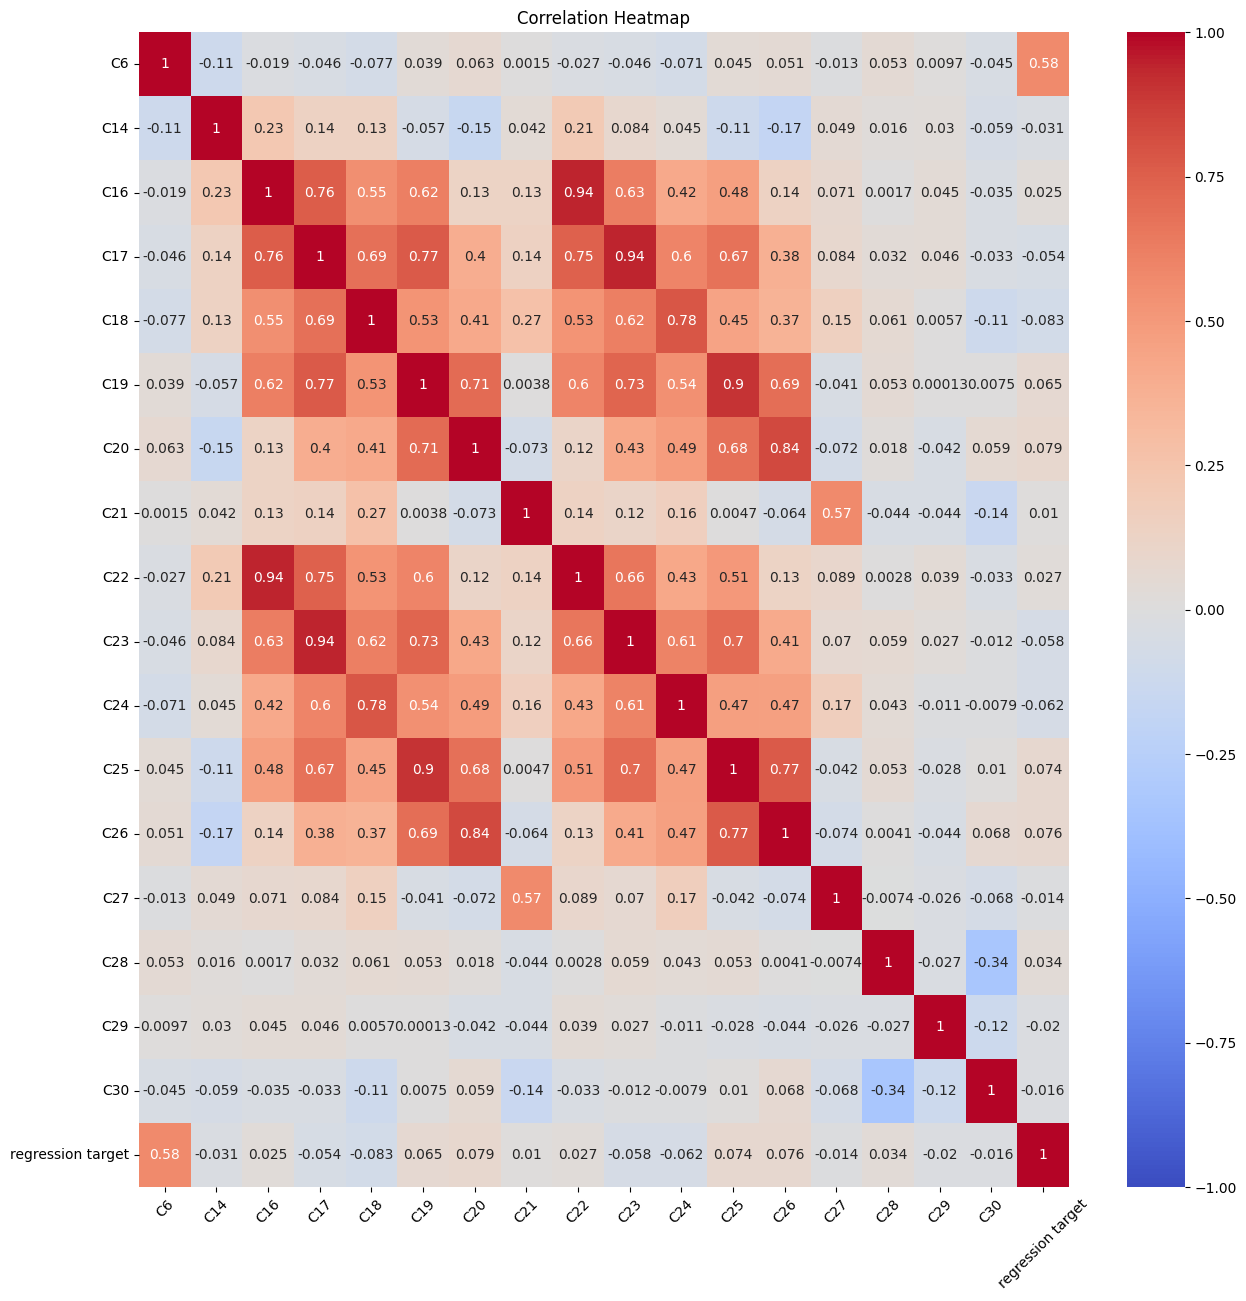

                   C6  C14       C16       C17       C18       C19       C20  \
C6                NaN  NaN       NaN       NaN       NaN       NaN       NaN   
C14               NaN  NaN       NaN       NaN       NaN       NaN       NaN   
C16               NaN  NaN       NaN  0.764918       NaN       NaN       NaN   
C17               NaN  NaN  0.764918       NaN       NaN  0.772668       NaN   
C18               NaN  NaN       NaN       NaN       NaN       NaN       NaN   
C19               NaN  NaN       NaN  0.772668       NaN       NaN  0.708144   
C20               NaN  NaN       NaN       NaN       NaN  0.708144       NaN   
C21               NaN  NaN       NaN       NaN       NaN       NaN       NaN   
C22               NaN  NaN  0.942614  0.745162       NaN       NaN       NaN   
C23               NaN  NaN       NaN  0.941014       NaN  0.734093       NaN   
C24               NaN  NaN       NaN       NaN  0.781797       NaN       NaN   
C25               NaN  NaN       NaN    

In [ ]:
#5 (a)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' containing the numerical features and regression targets
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Filter the correlation matrix for values greater than 0.5
filtered_correlation = correlation_matrix[((correlation_matrix > 0.7) & (correlation_matrix < 1))|((correlation_matrix < -0.7) & (correlation_matrix > -1))]

# Print the filtered correlation matrix
print(filtered_correlation)

Part 2 Pre-Processing

StandardScaler
Pros
1.	advantageous for methods relying on zero-centered input
2.	standardizes data to unit variance, useful when features exhibit varying variances and require normalization for equitable treatment.

Cons
1.	not be suitable for data containing outliers, as the scaling relies on mean and standard deviation, making outliers disproportionately influential.
2. not be suitable for data with non-normal distributions, as it assumes a normal distribution pattern.

MinMaxScaler
Pros
1.	maintains the relative data relationships by linearly scaling them within a predefined range.
2.	suitable for algorithms sensitive to feature scale, like support vector machines and neural networks with input-sensitive activation functions.
Cons
1.	not be appropriate for data containing outliers, as scaling hinges on minimum and maximum values, allowing outliers to disproportionately affect the process.
2. not be suitable for data exhibiting non-uniform distributions, as it has the potential to compress the data toward the outer boundaries of the scaling range

RobustScaler
Pros
1.	remains resilient against outliers within the data by employing the median and interquartile range for the scaling process.
2.	maintains the inherent relative relationships between data points, akin to the Max-Min Standard Scaler approach.
Cons
1. not be appropriate for data displaying non-uniform distributions, as it relies on the median and interquartile range, sensitive to the data’s distribution.


In [ ]:
# Q7 - 10
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
import pandas as pd

train_data_feature = train_data_features.copy()

categorical_features = train_data_feature.select_dtypes(exclude=['int64', 'float64']).columns

binary_categorical_features = ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
nominal_categorical_features = ['C0', 'C1', 'C3', 'C7']
ordinal_categorical_features = ['C2', 'C5']

numerical_features = train_data_feature.select_dtypes(include=['int64', 'float64']).columns

discrete_numerical_features = ['C14', 'C16', 'C17', 'C18', 'C19', 'C21', 'C22', 'C23', 'C24', 'C25', 'C27', 'C28', 'C29', 'C30']
continuous_numerical_features = ['C6','C20','C26']

# ----------------------------------- Q7 ---------------------------------------------------
# Handling Missing Data
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# numerical_features_data = pd.DataFrame(mean_imputer.fit_transform(train_data_feature[numerical_features]))
# numerical_features_data = pd.DataFrame(mode_imputer.fit_transform(train_data_feature[numerical_features]))
# numerical_features_data = pd.DataFrame(constant_imputer.fit_transform(train_data_feature[numerical_features]))

numerical_features_data = pd.DataFrame(median_imputer.fit_transform(train_data_feature[numerical_features]))
train_data_feature[numerical_features] = numerical_features_data

# categorical_features_data = pd.DataFrame(constant_imputer.fit_transform(train_data_feature[categorical_features]))

categorical_features_data = pd.DataFrame(mode_imputer.fit_transform(train_data_feature[categorical_features]))
train_data_feature[categorical_features] = categorical_features_data

# ----------------------------------- Q8 ---------------------------------------------------
# Standardization for numerical features

# ----- Q8 first numerical feature (original) -----
# print(train_data_features[numerical_features].iloc[:10,0])

# ------ Q8 StandardScaler ------
scaler = StandardScaler()
normalized_numerical_data = pd.DataFrame(scaler.fit_transform(train_data_feature[numerical_features]))
train_data_feature[numerical_features] = normalized_numerical_data
# display(train_data_feature[numerical_features].iloc[:10,0])

# ------- Q8 MinMaxScaler --------
# scaler = MinMaxScaler()
# normalized_numerical_data = pd.DataFrame(scaler.fit_transform(train_data_feature[numerical_features]))
# train_data_feature[numerical_features] = normalized_numerical_data
# display(train_data_feature[numerical_features].iloc[:10,0])

# -------- Q8 RobustScaler -----------
# scaler = RobustScaler()
# normalized_numerical_data = pd.DataFrame(scaler.fit_transform(train_data_feature[numerical_features]))
# train_data_feature[numerical_features] = normalized_numerical_data
# display(train_data_feature[numerical_features].iloc[:10,0])

# ----------------------------------- Q9 ---------------------------------------------------
# One-hot encoding for binary and nominal categorical features
onehot_encoder = OneHotEncoder()

# ----- Q9 first categorical feature (original) -----
# print(train_data_features[categorical_features].iloc[:10,0])

# ----- Q9 first categorical feature + one hot encoding -----
# onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(pd.DataFrame(train_data_features[categorical_features])).toarray(), columns=onehot_encoder.get_feature_names_out())
# print(onehot_encoded.filter(like = 'C0').iloc[:10,:])

binary_categorical_data = pd.DataFrame(onehot_encoder.fit_transform(pd.DataFrame(train_data_feature[binary_categorical_features])).toarray(), columns=onehot_encoder.get_feature_names_out())
display(binary_categorical_data)

nominal_categorical_data = pd.DataFrame(onehot_encoder.fit_transform(pd.DataFrame(train_data_feature[nominal_categorical_features])).toarray(), columns=onehot_encoder.get_feature_names_out())
# display(nominal_categorical_data)

# Ordinal-hot encoding for binary and nominal categorical features
ordinal_encoder = OrdinalEncoder()

# ----- Q9 first categorical feature + ordinal encoding -----
ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(pd.DataFrame(train_data_features[categorical_features])), columns=ordinal_encoder.get_feature_names_out())
print(ordinal_encoded.filter(like = 'C0').iloc[:10,:])

ordinal_categorical_data = pd.DataFrame(ordinal_encoder.fit_transform(pd.DataFrame(train_data_feature[ordinal_categorical_features])), columns=ordinal_encoder.get_feature_names_out())
# display(ordinal_categorical_data)

# ----------------------------------- Q10 -----------------------------------
# Feature Selection

combined_feature_names = []
selected_numerical_feature_names = []
selected_categorica_feature_names = []
selected_binary_categorica_feature_names = []
selected_nominal_categorica_feature_names = []
selected_ordinal_categorica_feature_names = []

# ----- Q10 VarianceThreshold -------
def checkVariances(X):
  all_true = all(variance > 1 for variance in X.var(axis=0))
  return all_true

variance_selector = VarianceThreshold(1)
if checkVariances(train_data_feature[numerical_features]):
  numerical_features_variance_selector = pd.DataFrame(variance_selector.fit_transform(train_data_feature[numerical_features] ))
  selected_numerical_feature_indices = variance_selector.get_support(indices=True)
  selected_numerical_feature_names = pd.DataFrame(train_data_feature[numerical_features]).columns[selected_numerical_feature_indices]
  combined_feature_names += list(selected_numerical_feature_names)

if checkVariances(binary_categorical_data):
  binary_categorical_features_variance_selector = pd.DataFrame(variance_selector.fit_transform(binary_categorical_data))
  selected_binary_categorical_feature_indices = variance_selector.get_support(indices=True)
  selected_binary_categorica_feature_names = pd.DataFrame(binary_categorical_data).columns[selected_binary_categorical_feature_indices]
  combined_feature_names += list(selected_binary_categorica_feature_names)
  selected_categorica_feature_names += list(selected_binary_categorica_feature_names)

if checkVariances(nominal_categorical_data):
  nominal_categorical_features_variance_selector = pd.DataFrame(variance_selector.fit_transform(nominal_categorical_data ))
  selected_nominal_categorical_feature_indices = variance_selector.get_support(indices=True)
  selected_nominal_categorica_feature_names = pd.DataFrame(nominal_categorical_data).columns[selected_nominal_categorical_feature_indices]
  combined_feature_names += list(selected_nominal_categorica_feature_names)
  selected_categorica_feature_names += list(selected_nominal_categorica_feature_names)

if checkVariances(ordinal_categorical_data):
  ordinal_categorical_features_variance_selector = pd.DataFrame(variance_selector.fit_transform(ordinal_categorical_data))
  selected_ordinal_categorical_feature_indices = variance_selector.get_support(indices=True)
  selected_ordinal_categorica_feature_names = pd.DataFrame(ordinal_categorical_data).columns[selected_ordinal_categorical_feature_indices]
  combined_feature_names += list(selected_ordinal_categorica_feature_names)
  selected_categorica_feature_names += list(selected_ordinal_categorica_feature_names)

# print(f"{combined_feature_names}")


# ------ Q10 SelectKBest --------
# k_best_selector = SelectKBest(chi2, k=3)
# numerical_features_k_best_selector = k_best_selector.fit_transform(numerical_features_data_scaled, train_data_labels.iloc[:,1])
# selected_feature_indices = k_best_selector.get_support(indices=True)
# selected_features = train_data_feature.columns[selected_feature_indices]
# print(selected_features)

,C4_daytime,C4_evening,C8_no,C8_yes,C9_no,C9_yes,C10_no,C10_yes,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3535,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3536,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3537,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


    C0
0  0.0
1  4.0
2  4.0
3  3.0
4  4.0
5  4.0
6  4.0
7  4.0
8  4.0
9  4.0


In [ ]:
display(binary_categorical_data)

,C4_daytime,C4_evening,C8_no,C8_yes,C9_no,C9_yes,C10_no,C10_yes,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3535,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3536,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3537,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


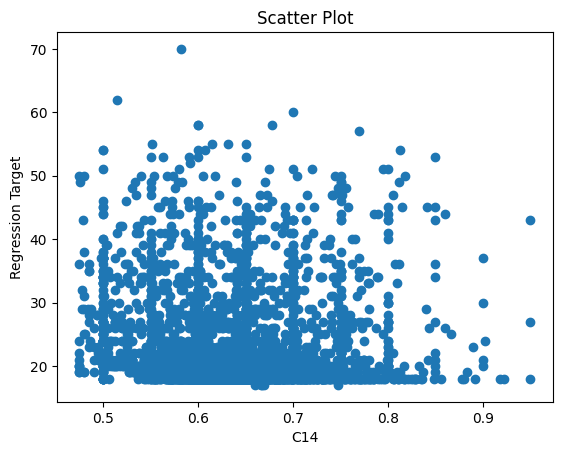

In [ ]:
# Q11
import matplotlib.pyplot as plt

feature = train_data_features.iloc[:,14]
label = train_data_labels.iloc[:,0]

# Create a scatter plot
plt.scatter(label, feature)

# Set labels and title
plt.xlabel('C14')
plt.ylabel('Regression Target')
plt.title('Scatter Plot')

# Display the plot
plt.show()


Part 3 Linear Regression[link text]

In [ ]:
# Q12 13
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Linear Regression Model for each feature
features = ['C4', 'C8', 'C9', 'C10', 'C11', 'C12']

train_regression_target = pd.DataFrame(train_data_labels.iloc[:,0])

# Iterate over the selected features
for feature in features:

    # Split the training data
    X_train, X_test, y_train, y_test = train_test_split(binary_categorical_data.filter(like=feature), train_regression_target, test_size=0.2, random_state=4211)
    # display(X_train)
    # display(y_train)

    # Build Linear Regression Model for the current feature
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)

    r2 = r2_score(y_test, linear_regression_model.predict(X_test))
    mse = mean_squared_error(y_test,linear_regression_model.predict(X_test))
    print(f"{feature}: R2 score = {r2}")
    print(f"{feature}: MSE score = {mse}")


C4: R2 score = -0.0005485151846300607
C4: MSE score = 0.004867082088082523
C8: R2 score = -0.0017531141065381117
C8: MSE score = 0.004872941755801945
C9: R2 score = -0.00032257500517074433
C9: MSE score = 0.004865983021536789
C10: R2 score = -0.006686626115260941
C10: MSE score = 0.004896940400110126
C11: R2 score = -0.0017023396594326723
C11: MSE score = 0.0048726947678765335
C12: R2 score = -0.0015922537536023906
C12: MSE score = 0.004872159264467868


In [ ]:
# Q12 Q13
from sklearn.model_selection import train_test_split
import time

train_regression_target = pd.DataFrame(train_data_labels.iloc[:,0])

# Split the reshaped data
combined_X_train, combined_X_test, combined_y_train, combined_y_test = train_test_split(binary_categorical_data.iloc[:,:12], train_regression_target, test_size=0.2, random_state=4211)
# print(binary_categorical_data.iloc[:,:12])

# Build the Linear Regression model using the combined features
combine_linear_regression_model = LinearRegression()
starting_time = time.time()
combine_linear_regression_model.fit(combined_X_train, combined_y_train)
ending_time = time.time()

training_time = ending_time - starting_time
print(training_time)

# Make predictions on the test data using the trained linear regression model
combined_predictions = combine_linear_regression_model.predict(combined_X_test)

r2 = r2_score(combined_y_test, combined_predictions)
mse = mean_squared_error(combined_y_test,combined_predictions)
print(f"All selected features: R2 score = {r2}")
print(f"All selected features: MSE score = {mse}")


0.008139610290527344
All selected features: R2 score = -0.010986095939094387
All selected features: MSE score = 0.004917854800811595


In [ ]:
# Q14
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Linear Regression Model for each feature

train_regression_target = pd.DataFrame(train_data_labels.iloc[:,0])

features = ['C0']

# Iterate over the selected features
for feature in features:

     # Split the training data
    X_train, X_test, y_train, y_test = train_test_split(nominal_categorical_data.filter(like=feature), train_regression_target, test_size=0.2, random_state=4211)
    # display(X_train)
    # display(y_train)

    # Build Linear Regression Model for the current feature
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)

    r2 = r2_score(y_test, linear_regression_model.predict(X_test))
    mse = mean_squared_error(y_test,linear_regression_model.predict(X_test))
    print(f"{feature}: R2 score = {r2}")
    print(f"{feature}: MSE score = {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Number of Hidden Units: 1

Mean of Training Time:  0.46552109718322754
Standard deviation  of Training Time: 0.2970398402226503

Mean of R2 Scores:  -0.0038840153014696455
Standard deviation ofR2 Scores: 0.003939767016375025


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Hidden Units: 8

Mean of Training Time:  0.6639928023020426
Standard deviation  of Training Time: 0.16335417739078195

Mean of R2 Scores:  -0.03193546217774249
Standard deviation ofR2 Scores: 0.02107683314156001


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Hidden Units: 32

Mean of Training Time:  0.68153977394104
Standard deviation  of Training Time: 0.16425848086876876

Mean of R2 Scores:  -0.01317267338748418
Standard deviation ofR2 Scores: 0.005548845553786745


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Hidden Units: 128

Mean of Training Time:  1.2532612482706706
Standard deviation  of Training Time: 0.32188530050777464

Mean of R2 Scores:  -0.003570219583376333
Standard deviation ofR2 Scores: 0.00283084914637955
[-0.006440730853311427, 0.0002817867878522895, -0.004551714684669861]


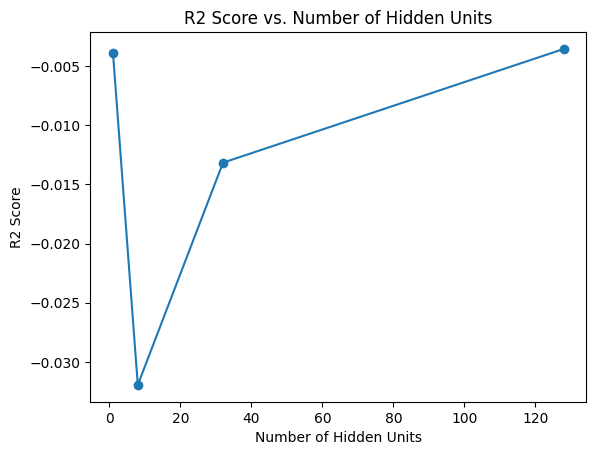

Number of Hidden Units: 1
 Training Time: 1.1614 seconds 	 R2 Score: -0.0064

Number of Hidden Units: 8
 Training Time: 1.6853 seconds 	 R2 Score: 0.0003

Number of Hidden Units: 32
 Training Time: 0.9131 seconds 	 R2 Score: -0.0046

Mean of Training Time:  1.2532612482706706
Standard deviation  of Training Time: 0.32188530050777464

Mean of R2 Scores:  -0.003570219583376333
Standard deviation ofR2 Scores: 0.00283084914637955


In [ ]:
# Q15 16
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

hidden_units = [1, 8, 32, 128]
train_regression_target = pd.DataFrame(train_data_labels.iloc[:,0])

X_train, X_test, y_train, y_test = train_test_split(binary_categorical_data.iloc[:,:12], train_regression_target, test_size=0.2, random_state=4211)

mean_r2_scores = []

for h in hidden_units:
  r2_scores = []
  training_times = []
  for i in range(3):
    model = MLPRegressor(hidden_layer_sizes=(h, h, h), early_stopping=True)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    training_times.append(training_time)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
  print(f"Number of Hidden Units: {h}\n")
  print(f"Mean of Training Time:  {np.mean([training_times])}")
  print(f"Standard deviation  of Training Time: {np.std(training_times)}")
  print()
  print(f"Mean of R2 Scores:  {np.mean([r2_scores])}")
  mean_r2_scores.append(np.mean([r2_scores]))
  print(f"Standard deviation ofR2 Scores: {np.std(r2_scores)}")

print(r2_scores)

# Q16
# Plotting the R2 scores
plt.plot(hidden_units, mean_r2_scores, marker='o')
plt.xlabel('Number of Hidden Units')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Number of Hidden Units')
plt.show()

# Printing the training times and R2 scores
for h, time, score in zip(hidden_units, training_times, r2_scores):
    print(f"Number of Hidden Units: {h}\n Training Time: {time:.4f} seconds \t R2 Score: {score:.4f}\n")


print(f"Mean of Training Time:  {np.mean([training_times])}")
print(f"Standard deviation  of Training Time: {np.std(training_times)}")
print()
print(f"Mean of R2 Scores:  {np.mean([r2_scores])}")
print(f"Standard deviation ofR2 Scores: {np.std(r2_scores)}")



Part 4: Classification

In [ ]:
# Q17 18
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

# Concatenate the dataframes along the columns

label_encoder = LabelEncoder()

train_classification_target = label_encoder.fit_transform(pd.DataFrame(train_data_labels.iloc[:,1]))
# "selected_feature_names" from Q10
# numerical_features = selected_numerical_feature_names
samples = pd.concat([train_data_feature[selected_numerical_feature_names], ordinal_categorical_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(samples, train_classification_target, test_size=0.2, random_state=4211)

# Set the number of repetitions for each setting
num_repetitions = 3

# Set the learning rates (step sizes) to try
learning_rates = [0.7]

# Initialize lists to store the results
training_times = []
accuracies = []
f1_scores = []

# Repeat the process for each learning rate
for learning_rate in learning_rates:
    # Initialize lists to store the results for each repetition
    repetition_training_times = []
    repetition_accuracies = []
    repetition_f1_scores = []

    for _ in range(num_repetitions):
        # Create an SGDClassifier model with logistic loss and the specified learning rate
        sgd = SGDClassifier(loss='log', learning_rate='optimal', eta0=learning_rate)

        # Start the timer
        start_time = time.time()
        sgd.fit(X_train, y_train)
        end_time = time.time()

        training_time = end_time - start_time

        # Make predictions on the validation data
        y_pred = sgd.predict(X_test)

        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Append the results to the repetition lists
        repetition_training_times.append(training_time)
        repetition_accuracies.append(accuracy)
        repetition_f1_scores.append(f1)

        # Calculate the false positive rate, true positive rate, and thresholds
        y_pred_proba = sgd.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

        # Calculate the AUC value
        auc_value = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, linestyle='-', label='ROC curve (AUC = %0.2f)' % auc_value)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC with Learning Rate {learning_rate}')
        plt.legend(loc="lower right")
        plt.show()

        print("AUC: ", auc_value)


    # Calculate the mean and standard deviation for each repetition
    mean_training_time = np.mean(repetition_training_times)
    std_training_time = np.std(repetition_training_times)
    mean_accuracy = np.mean(repetition_accuracies)
    std_accuracy = np.std(repetition_accuracies)
    mean_f1_score = np.mean(repetition_f1_scores)
    std_f1_score = np.std(repetition_f1_scores)

    # Print the results for each setting
    print(f"Learning Rate: {learning_rate}")
    print(f"Mean Training Time: {mean_training_time} seconds")
    print(f"Standard Deviation of Training Time: {std_training_time}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of Accuracy: {std_accuracy}")
    print(f"Mean F1 Score: {mean_f1_score}")
    print(f"Standard Deviation of F1 Score: {std_f1_score}")
    print("-------------------")


In [ ]:
# Q19

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

# Concatenate the dataframes along the columns

label_encoder = LabelEncoder()

train_classification_target = label_encoder.fit_transform(pd.DataFrame(train_data_labels.iloc[:,1]))
train_data_classification = pd.concat([train_data_feature[numerical_features] , binary_categorical_data, nominal_categorical_data, ordinal_categorical_data], axis=1)
print(train_data_classification)

X_train, X_test, y_train, y_test = train_test_split(train_data_classification, train_classification_target, test_size=0.2, random_state=4211)

# Set the number of repetitions for each setting
num_repetitions = 3

# Set the learning rates (step sizes) to try
learning_rates = [0.5,0.7,0.9]

# Initialize lists to store the results
training_times = []
accuracies = []
f1_scores = []

# Repeat the process for each learning rate
for learning_rate in learning_rates:
    # Initialize lists to store the results for each repetition
    repetition_training_times = []
    repetition_accuracies = []
    repetition_f1_scores = []

    for _ in range(num_repetitions):
        # Create an SGDClassifier model with logistic loss and the specified learning rate
        sgd = SGDClassifier(loss='log', learning_rate='optimal', eta0=learning_rate)

        # Start the timer
        start_time = time.time()
        sgd.fit(X_train, y_train)
        end_time = time.time()

        training_time = end_time - start_time

        # Make predictions on the validation data
        y_pred = sgd.predict(X_test)

        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Append the results to the repetition lists
        repetition_training_times.append(training_time)
        repetition_accuracies.append(accuracy)
        repetition_f1_scores.append(f1)


    # Calculate the mean and standard deviation for each repetition
    mean_training_time = np.mean(repetition_training_times)
    std_training_time = np.std(repetition_training_times)
    mean_accuracy = np.mean(repetition_accuracies)
    std_accuracy = np.std(repetition_accuracies)
    mean_f1_score = np.mean(repetition_f1_scores)
    std_f1_score = np.std(repetition_f1_scores)

    # Print the results for each setting
    print(f"Learning Rate: {learning_rate}")
    print(f"Mean Training Time: {mean_training_time} seconds")
    print(f"Standard Deviation of Training Time: {std_training_time}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of Accuracy: {std_accuracy}")
    print(f"Mean F1 Score: {mean_f1_score}")
    print(f"Standard Deviation of F1 Score: {std_f1_score}")
    print("-------------------")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


            C6       C14       C16       C17       C18       C19       C20  \
0    -0.200135  1.588338 -0.300492 -0.508745 -0.773146 -1.531520 -2.255518   
1    -0.200135  0.241831 -0.300492 -0.096082  1.130934 -0.552583  0.202131   
2    -1.031074 -0.162121 -0.300492 -0.096082 -0.535136  0.426354  0.728771   
3     0.034039  2.530892 -0.300492 -0.096082 -1.963196 -1.531520 -2.255518   
4     0.706344 -0.162121 -0.300492  0.316581 -0.297126  0.426354  0.341482   
...        ...       ...       ...       ...       ...       ...       ...   
3534  0.102025 -0.700724  0.139128 -0.096082 -0.059116  0.426354  0.212163   
3535  0.026485 -0.431422 -0.300492 -0.096082  0.178894  0.100042  0.763880   
3536 -2.466332 -0.027470 -0.300492 -0.096082 -0.535136  0.426354  0.728771   
3537 -0.426755 -0.566073 -0.300492 -0.096082 -0.535136  0.426354  0.588333   
3538  0.253105 -0.700724 -0.300492 -0.508745 -0.297126  0.100042  0.398743   

           C21       C22       C23  ...  C7_Moldova (Republic o

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Learning Rate: 0.6
Mean Training Time: 0.05544694264729818 seconds
Standard Deviation of Training Time: 0.005454806039237257
Mean Accuracy: 0.8733521657250471
Standard Deviation of Accuracy: 0.009671675416277876
Mean F1 Score: 0.9139822881093195
Standard Deviation of F1 Score: 0.004291308977535878
-------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Learning Rate: 0.7
Mean Training Time: 0.0650184154510498 seconds
Standard Deviation of Training Time: 0.00860173760099529
Mean Accuracy: 0.8804143126177024
Standard Deviation of Accuracy: 0.006658255943376119
Mean F1 Score: 0.9184938951000378
Standard Deviation of F1 Score: 0.0028111206092769677
-------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Learning Rate: 0.8
Mean Training Time: 0.07465569178263347 seconds
Standard Deviation of Training Time: 0.008905768073115767
Mean Accuracy: 0.8804143126177024
Standard Deviation of Accuracy: 0.004366110402775784
Mean F1 Score: 0.9187046156625746
Standard Deviation of F1 Score: 0.002545358972036569
-------------------
Learning Rate: 0.9
Mean Training Time: 0.05656298001607259 seconds
Standard Deviation of Training Time: 0.002896123270946417
Mean Accuracy: 0.879472693032015
Standard Deviation of Accuracy: 0.006658255943376171
Mean F1 Score: 0.9166715975164296
Standard Deviation of F1 Score: 0.002702164095821813
-------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hidden Units: 1
Training Time (mean): 0.106 s
Training Time (std): 0.003 s
Accuracy (mean): 0.565
Accuracy (std): 0.185
F1 Score (mean): 0.547
F1 Score (std): 0.387

Hidden Units: 8
Training Time (mean): 0.304 s
Training Time (std): 0.045 s
Accuracy (mean): 0.889
Accuracy (std): 0.001
F1 Score (mean): 0.924
F1 Score (std): 0.001

Hidden Units: 32
Training Time (mean): 0.414 s
Training Time (std): 0.096 s
Accuracy (mean): 0.886
Accuracy (std): 0.003
F1 Score (mean): 0.921
F1 Score (std): 0.003

Hidden Units: 128
Training Time (mean): 0.840 s
Training Time (std): 0.165 s
Accuracy (mean): 0.886
Accuracy (std): 0.002
F1 Score (mean): 0.922
F1 Score (std): 0.001



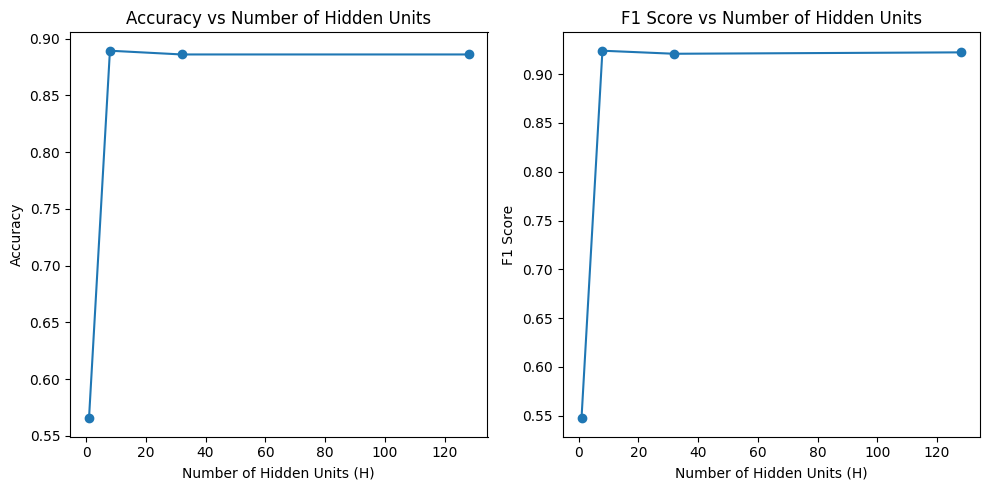

In [ ]:
# 20
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import time

hidden_units = [1, 8, 32, 128]
training_times = []
accuracies = []
f1_scores = []
label_encoder = LabelEncoder()

train_classification_target = label_encoder.fit_transform(pd.DataFrame(train_data_labels.iloc[:,1]))
train_data_classification = pd.concat([train_data_feature[numerical_features] , binary_categorical_data, nominal_categorical_data, ordinal_categorical_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data_classification, train_classification_target, test_size=0.2, random_state=4211)


for H in hidden_units:
  training_times_rep = []
  accuracies_rep = []
  f1_scores_rep = []
  # Create an instance of MLPClassifier with the desired parameters
  clf = MLPClassifier(hidden_layer_sizes=(H, H, H), early_stopping=True)

  for _ in range(3): # Repeat three times

        # Train the classifier and record the training time
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()

        training_time = end_time - start_time
        training_times_rep.append(training_time)

        # Make predictions on the validation set
        y_pred = clf.predict(X_test)

        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_rep.append(accuracy)
        f1_scores_rep.append(f1)

  # Calculate mean and standard deviation of training time, accuracy, and F1 score for the current setting
  mean_training_time = np.mean(training_times_rep)
  std_training_time = np.std(training_times_rep)
  mean_accuracy = np.mean(accuracies_rep)
  std_accuracy = np.std(accuracies_rep)
  mean_f1 = np.mean(f1_scores_rep)
  std_f1 = np.std(f1_scores_rep)

  # Append mean values to the overall results lists
  training_times.append(mean_training_time)
  accuracies.append(mean_accuracy)
  f1_scores.append(mean_f1)

  # Print results for the current setting
  print(f"Hidden Units: {H}")
  print(f"Training Time (mean): {mean_training_time:.3f} s")
  print(f"Training Time (std): {std_training_time:.3f} s")
  print(f"Accuracy (mean): {mean_accuracy:.3f}")
  print(f"Accuracy (std): {std_accuracy:.3f}")
  print(f"F1 Score (mean): {mean_f1:.3f}")
  print(f"F1 Score (std): {std_f1:.3f}")
  print()

# Plot the accuracy and F1 score for each value of H
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hidden_units, accuracies, 'o-')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Hidden Units')

plt.subplot(1, 2, 2)
plt.plot(hidden_units, f1_scores, 'o-')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Hidden Units')

plt.tight_layout()
plt.show()



Part 5 Performance Enhancement

In [ ]:
# Q24

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

train_data_feature = train_data_features.copy()
train_classification_target = pd.DataFrame(train_data_labels.iloc[:,1])


numerical_features = train_data_feature.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data_feature.select_dtypes(exclude=['int64', 'float64']).columns

discrete_numerical_features = ['C14', 'C16', 'C17', 'C18', 'C19', 'C21', 'C22', 'C23', 'C24', 'C25', 'C27', 'C28', 'C29', 'C30']
continuous_numerical_features = ['C6','C20','C26']

binary_categorical_features = ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
nominal_categorical_features = ['C0', 'C1', 'C3', 'C7']
ordinal_categorical_features = ['C2', 'C5']

# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder())
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])

# preprocessor.set_output(transform='pandas')

# Create a pipeline with the preprocessor and the neural network classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(32, 32, 32)))
])

# X_tra?in, X_test, y_train, y_test = train_test_split(train_data_feature, train_classification_target, test_size=0.2, random_state=42)
X_train = train_data_features
X_test = test_data_features
y_train = train_data_labels.iloc[:,1]
y_test = test_data_labels.iloc[:,1]

start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training Time:", training_time)

# Preprocess the test set using the preprocessor
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Make predictions on the preprocessed test set
y_pred = pipeline.named_steps['classifier'].predict(X_test_preprocessed)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, pos_label = 'success')
print("F1 Score:", f1)

Training Time: 3.2670841217041016
Accuracy: 0.8253424657534246
F1 Score: 0.8704487722269263


In [ ]:
# Q25

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

train_data_feature = train_data_features.copy()
train_classification_target = pd.DataFrame(train_data_labels.iloc[:,1])


numerical_features = train_data_feature.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data_feature.select_dtypes(exclude=['int64', 'float64']).columns

discrete_numerical_features = ['C14', 'C16', 'C17', 'C18', 'C19', 'C21', 'C22', 'C23', 'C24', 'C25', 'C27', 'C28', 'C29', 'C30']
continuous_numerical_features = ['C6','C20','C26']

binary_categorical_features = ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
nominal_categorical_features = ['C0', 'C1', 'C3', 'C7']
ordinal_categorical_features = ['C2', 'C5']


# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline([
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])
remaining_categorical_features = list(set(categorical_features) - set(ordinal_categorical_features))
# print(remaining_categorical_features)

ordinal_categorical_transformer = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

categorical_transformer = ColumnTransformer([
    ('ordinal', ordinal_categorical_transformer, ordinal_categorical_features),
    ('onehot', OneHotEncoder(), remaining_categorical_features)
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])

# preprocessor.set_output(transform='pandas')

# Create a pipeline with the preprocessor and the neural network classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(32, 32, 32)))
])

# X_train, X_test, y_train, y_test = train_test_split(train_data_feature, train_classification_target, test_size=0.2, random_state=42)
X_train = train_data_features
X_test = test_data_features
y_train = train_data_labels.iloc[:,1]
y_test = test_data_labels.iloc[:,1]

start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training Time:", training_time)

# Preprocess the test set using the preprocessor
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Make predictions on the preprocessed test set
y_pred = pipeline.named_steps['classifier'].predict(X_test_preprocessed)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, pos_label = 'success')
print("F1 Score:", f1)

Training Time: 4.385471820831299
Accuracy: 0.8310502283105022
F1 Score: 0.8737201365187715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Q26

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

train_data_feature = train_data_features.copy()
train_classification_target = pd.DataFrame(train_data_labels.iloc[:,1])


numerical_features = train_data_feature.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data_feature.select_dtypes(exclude=['int64', 'float64']).columns

discrete_numerical_features = ['C14', 'C16', 'C17', 'C18', 'C19', 'C21', 'C22', 'C23', 'C24', 'C25', 'C27', 'C28', 'C29', 'C30']
continuous_numerical_features = ['C6','C20','C26']

binary_categorical_features = ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
nominal_categorical_features = ['C0', 'C1', 'C3', 'C7']
ordinal_categorical_features = ['C2', 'C5']


# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline([
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

remaining_categorical_features = list(set(categorical_features) - set(ordinal_categorical_features))

ordinal_categorical_transformer = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])


other_categorical_transformer = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

categorical_transformer = ColumnTransformer([
    ('ordinal', ordinal_categorical_transformer, ordinal_categorical_features),
    ('onehot', other_categorical_transformer, remaining_categorical_features)
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])

# preprocessor.set_output(transform='pandas')

# Create a pipeline with the preprocessor and the neural network classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(32, 32, 32)))
])

# X_train, X_test, y_train, y_test = train_test_split(train_data_feature, train_classification_target, test_size=0.2, random_state=42)
X_train = train_data_features
X_test = test_data_features
y_train = train_data_labels.iloc[:,1]
y_test = test_data_labels.iloc[:,1]

start_time = time.time()
pipeline.fit(X_train, y_train)

end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training Time:", training_time)

# Preprocess the test set using the preprocessor
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Make predictions on the preprocessed test set
y_pred = pipeline.named_steps['classifier'].predict(X_test_preprocessed)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, pos_label = 'success')
print("F1 Score:", f1)

Training Time: 3.6350436210632324
Accuracy: 0.8504566210045662
F1 Score: 0.888129803586678


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Q27

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
import time
import pandas as pd

train_data_feature = train_data_features.copy()
train_classification_target = pd.DataFrame(train_data_labels.iloc[:,1])


numerical_features = train_data_feature.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data_feature.select_dtypes(exclude=['int64', 'float64']).columns

# Feature Selection from Q10
# combined_feature_names = []
# selected_numerical_feature_names = []
# selected_categorical_feature_names = []
# selected_binary_categorica_feature_names = []
# selected_nominal_categorica_feature_names = []
# selected_ordinal_categorica_feature_names = []

print(combined_feature_names)

# data preprocessing from Q26

# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline([
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


ordinal_categorical_transformer = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])


other_categorical_transformer = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

categorical_transformer = ColumnTransformer([
    ('ordinal', ordinal_categorical_transformer, selected_ordinal_categorica_feature_names),
    ('onehot', other_categorical_transformer, list(selected_nominal_categorica_feature_names)+list(selected_binary_categorica_feature_names))
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, selected_numerical_feature_names),
    ('categorical', categorical_transformer, selected_categorica_feature_names)
])

# preprocessor.set_output(transform='pandas')

# Create a pipeline with the preprocessor and the neural network classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=4211, early_stopping=True))
])

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(8,8,8),(32,32,32)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001],
}
# df = train_data_feature[combined_feature_names]
# print(df[selected_categorica_feature_names])

pipeline.fit(train_data_feature[combined_feature_names], train_classification_target)
X_preprocessed = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(train_data_feature[combined_feature_names]))

display(X_preprocessed)

# Split the data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, train_classification_target, test_size=0.0, random_state=4211)


# Make predictions on the preprocessed test set
# y_pred = pipeline.named_steps['classifier'].predict(X_test)


# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline.named_steps['classifier'], param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_preprocessed,train_classification_target)


# Get the results
results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the five combinations of hyperparameter settings and their validation accuracies
for i in range(len(results['params'])):
    print("Hyperparameter Setting: ", results['params'][i])
    print("Validation Accuracy (mean): ", results['mean_test_score'][i])
    print("Validation Accuracy (std): ", results['std_test_score'][i])
    print()

# Print the best hyperparameter setting
print("Best Hyperparameter Setting: ", best_params)
print("Best Validation Accuracy: ", best_score)


['C22', 'C27', 'C28', 'C29', 'C30', 'C2', 'C5']


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5,6
0,0.000000,0.0,0.406977,0.311111,0.803170,4.0,8.0
1,0.000000,0.0,0.406977,0.311111,0.803170,4.0,15.0
2,0.000000,0.0,0.372093,0.488889,0.766182,5.0,6.0
3,0.000000,0.0,0.918605,0.800000,0.000000,4.0,5.0
4,0.000000,0.0,0.000000,0.755556,0.578600,2.0,15.0
...,...,...,...,...,...,...,...
3534,0.000000,0.0,0.732558,0.488889,0.640687,7.0,15.0
3535,0.222222,0.0,0.918605,0.800000,0.000000,4.0,15.0
3536,0.000000,0.0,0.593023,1.000000,0.311757,4.0,15.0
3537,0.000000,0.0,0.406977,0.311111,0.803170,0.0,15.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Hyperparameter Setting:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8, 8)}
Validation Accuracy (mean):  0.7010436394729063
Validation Accuracy (std):  0.003891913991119945

Hyperparameter Setting:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 32, 32)}
Validation Accuracy (mean):  0.6928527477445081
Validation Accuracy (std):  0.011024577434111534

Hyperparameter Setting:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (8, 8, 8)}
Validation Accuracy (mean):  0.7007611535972
Validation Accuracy (std):  0.004530399268666779

Hyperparameter Setting:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32, 32, 32)}
Validation Accuracy (mean):  0.6928527477445081
Validation Accuracy (std):  0.010314050431608107

Hyperparameter Setting:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8, 8)}
Validation Accuracy (mean):  0.6877648055362438
Validation Accuracy (std):  0.00017660361677815928

Hyperparamete